# Task 3 
### Dataset : COVID 19 Tweets 

### Objective : Perform exploratory data analysis of covid 19 tweets dataset

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
df = pd.read_csv("C:/Users/NIKITA/Desktop/covid19_tweets.csv")
# head of dataset
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [3]:
# Print shape of dataset
df.shape

(179108, 13)

# Exploratory Data analysis

In [4]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [5]:
# Dataframe of missing values
missing_values=pd.DataFrame(df.isnull().sum(),columns=['Total missing values'])
missing_values

,Total missing values
user_name,0
user_location,36771
user_description,10286
user_created,0
user_followers,0
user_friends,0
user_favourites,0
user_verified,0
date,0
text,0


# Data Visualization

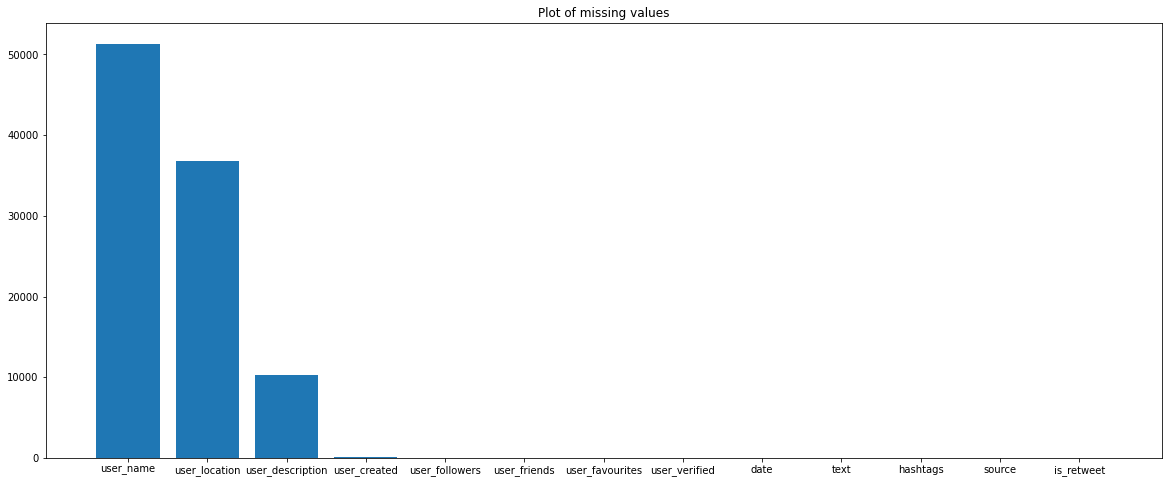

In [6]:
# Plot of missing values
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.bar(df.columns,missing_values['Total missing values'].sort_values(ascending=False))
plt.title("Plot of missing values")
plt.show()

### From above plot,user name has maximum number of missing values.

<AxesSubplot:>

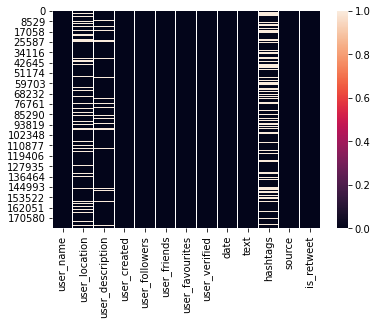

In [7]:
# Heatmap of missing values
sns.heatmap(df.isnull())

## Top 50 user location in which users are tweeted 

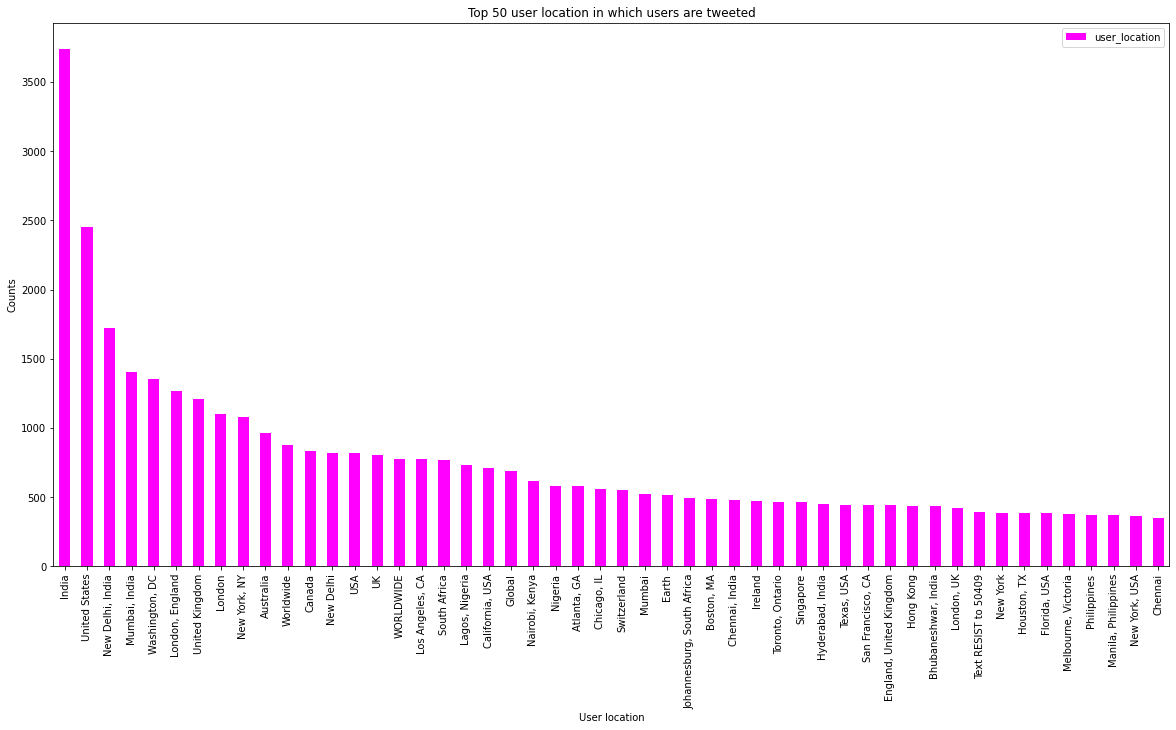

In [8]:
# Top 50 user location 
plt.figure(figsize=(20,10))
df['user_location'].value_counts().head(50).plot(kind='bar',color='magenta')
plt.title("Top 50 user location in which users are tweeted")
plt.xlabel("User location")
plt.ylabel("Counts")
plt.legend()
plt.show()

#### India is user location in which users are mostly tweeted.

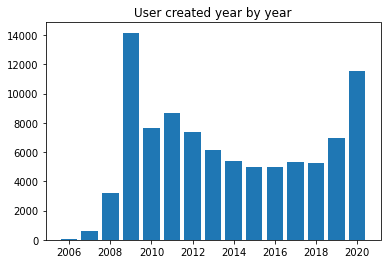

In [9]:
# Plot of User created year by year
df['user_created'] = pd.to_datetime(df['user_created'])
df['year_created'] = df['user_created'].dt.year
data = df.drop_duplicates(subset='user_name', keep="first")
data = data[data['year_created']>1970]
data = data['year_created'].value_counts().reset_index()
data.columns = ['year', 'number']

plt.bar(data['year'],data['number'])
plt.title('User created year by year')
plt.show()

#### Mostly user created tweets in 2019.

##  Top 10 hashtags in tweets

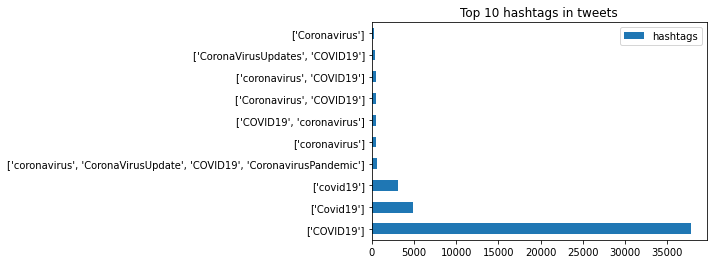

In [10]:
# Top 10 hashtags in tweets
df['hashtags'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 hashtags in tweets')
plt.legend()
plt.show()

####  ['COVID19']  is mostly used hashtag in tweets.

## Top 20 sources which is used for tweets

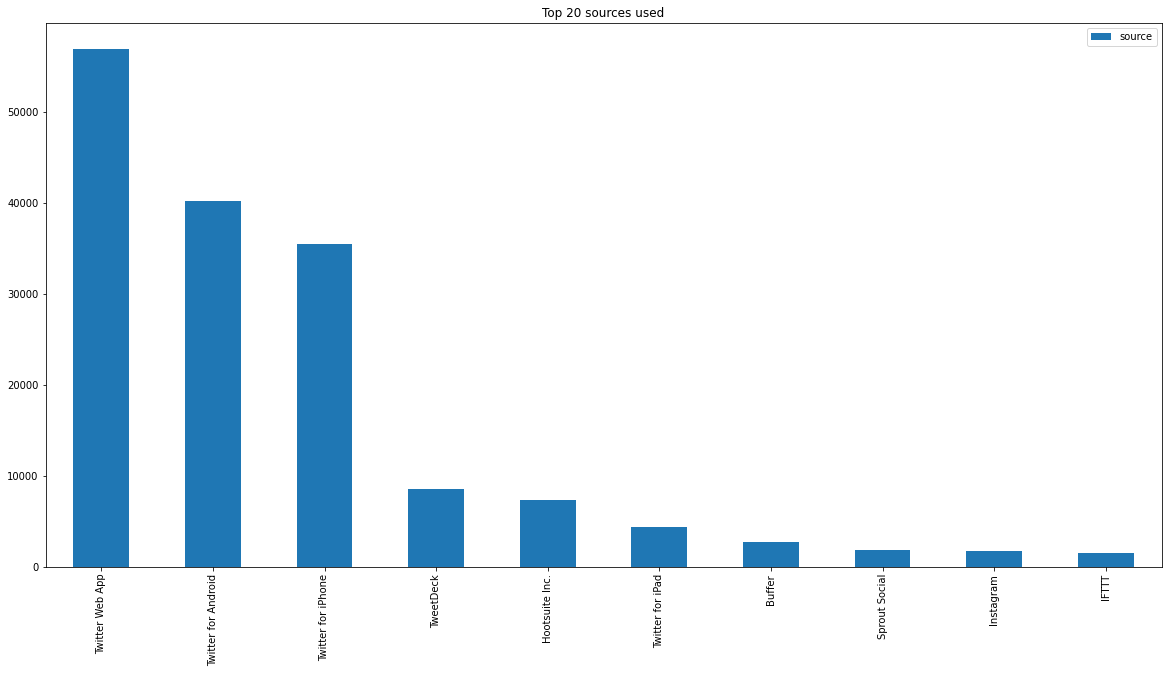

In [11]:
# Top 20 sources used
plt.figure(figsize=(20,10))
df['source'].value_counts().head(10).plot(kind='bar')
plt.title('Top 20 sources used')
plt.legend()
plt.show()

#### Twitter Web App is mostly used source.

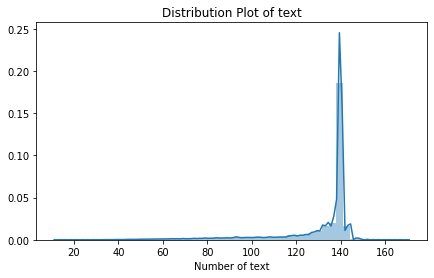

In [12]:
# Distribution plot of text
df["Number of text"] = df["text"].apply(lambda x: len(x))
plt.figure(figsize=(7,4))
sns.distplot(df["Number of text"])
plt.title("Distribution Plot of text")
plt.xlabel("Number of text")
plt.show()

# Explore text data using wordcloud

In [13]:
# Define generating frequency of text
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq


In [14]:
# Cleaning data
import re

def clean_text(text):
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

##  Wordcloud for India

In [15]:
# Dataset for which user location is India
df_1 = df[df.user_location == 'India']
df_1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,year_created,Number of text
75,InvestmentGuruIndia,India,our ambition is to create universal platform 4...,2015-04-03 07:39:09,15635,35,2,False,2020-07-25 12:25:05,"Covid to shrink power sector growth, take disc...",['Industry'],Twitter Web App,False,2015,131
76,St. Jude India ChildCare Centres,India,A home away from home for underprivileged fami...,2012-02-29 12:21:42,635,371,772,False,2020-07-25 12:25:05,#SaturdayVibes: The current situation calls fo...,['SaturdayVibes'],Twitter Web App,False,2012,140
120,Livemint,India,Breaking news and analyses of Indian and world...,2008-11-27 09:07:38,1902888,117,472,True,2020-07-25 12:23:44,"Bihar witnesses biggest single-day spike of 2,...",['Covid19'],Twitter Web App,False,2008,117
208,Business Standard,India,Latest updates #news #LIVE coverage on #econom...,2009-06-01 08:52:08,1969497,380,140,True,2020-07-25 12:20:41,"From more than 1,000 deaths in the US, fourth ...",NaN,TweetDeck,False,2009,139
220,TNN,India,"Lightning fast alerts, BreakingNews, Corona Up...",2020-03-24 04:29:04,171,74,50,False,2020-07-25 12:20:24,"#COVID19 in #AndhraPradesh:\n\n-7,813 new case...","['COVID19', 'AndhraPradesh']",Twitter Web App,False,2020,140


In [16]:
# Shape of dataset for India
df_1.shape

(3741, 15)

In [17]:
# Generate frequency
gen_freq(df_1.text.str)

the            1733
in             1583
#COVID19       1553
of             1364
to             1355
               ... 
appreciate        1
Economy           1
#sbryder          1
componen…         1
#University       1
Length: 18954, dtype: int64

In [18]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [19]:
#Print list of stopwards
print(STOPWORDS)

{"they've", "won't", 'myself', "wasn't", 'yourself', "can't", "i'm", 'i', 'its', "that's", 'some', 'was', 'should', 'com', 'the', 'here', "haven't", 'herself', "weren't", "wouldn't", "you'll", 'had', "don't", "they'll", 'am', 'ever', "hadn't", "you'd", "you've", 'but', 'do', 'own', 'again', "they're", 'themselves', "he's", 'into', "i'd", 'http', "who's", 'also', 'at', 'did', 'so', 'up', "you're", 'hers', 'on', 'and', 'his', 'as', 'few', 'doing', 'being', 'which', "here's", 'himself', 'ought', 'they', 'hence', 'she', 'further', 'nor', 'between', "when's", 'who', 'most', 'this', 'each', 'cannot', 'yours', 'where', 'out', "they'd", 'ours', "she'll", 'not', 'since', 'these', 'has', 'above', 'through', 'over', "isn't", 'those', "what's", "didn't", 'no', 'until', 'to', "i've", 'www', 'any', "doesn't", "there's", 'under', "we're", 'when', "mustn't", 'in', 'would', 'been', 'an', "why's", 'else', 'from', 'very', 'a', 'all', 'or', 'off', 'k', 'him', "where's", 'were', 'once', 'however', 'too', '

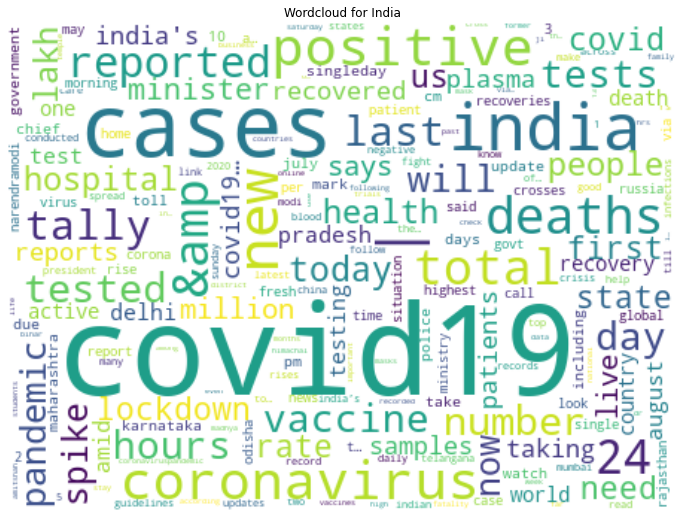

In [20]:
text = df_1.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.title('Wordcloud for India')
plt.axis('off')
plt.show()

## Wordcloud for United States

In [21]:
df_2= df[df['user_location']=='United States']

In [22]:
#gen_freq(df_2.text.str)

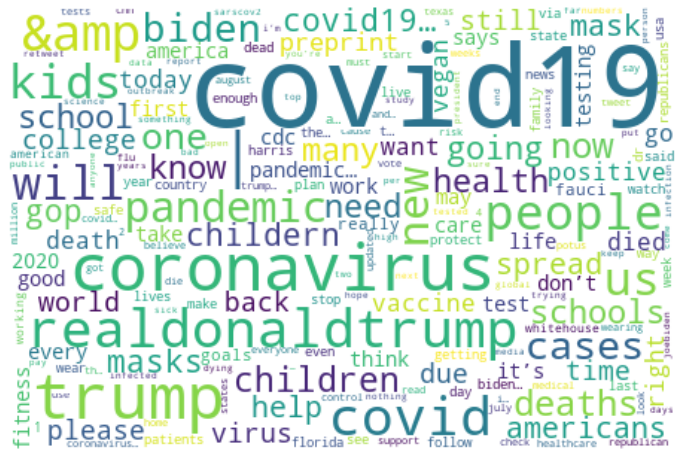

In [23]:
text = df_2.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=300, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Wordcloud for New Delhi,India

In [24]:
df_3 = df[df['user_location']=='New Delhi,India']

In [25]:
#gen_freq(df_3.text.str)

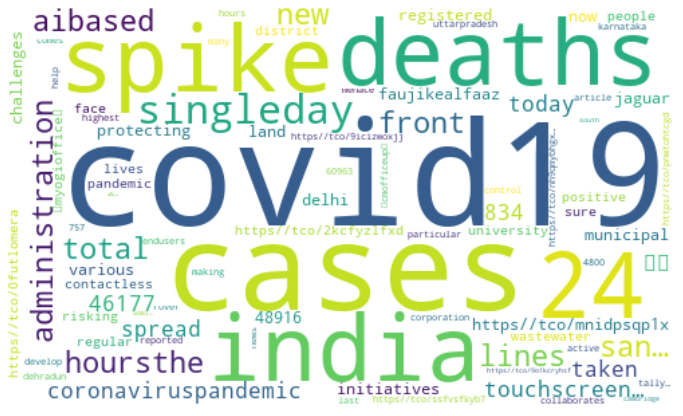

In [26]:
text = df_3.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=500, height=300, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Wordcloud for Mumbai, India 

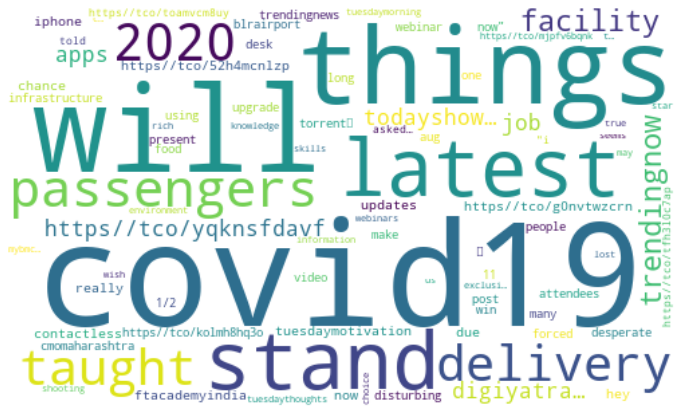

In [27]:
df_4 = df[df['user_location']=='Mumbai,India']
text = df_4.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=500, height=300, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Wordcloud for all user locations in dataset

In [28]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{"they've", "won't", 'myself', "wasn't", 'yourself', "can't", "i'm", 'i', 'its', "that's", 'some', 'was', 'should', 'com', 'the', 'here', "haven't", 'herself', "weren't", "wouldn't", "you'll", 'had', "don't", "they'll", 'am', 'ever', "hadn't", "you'd", "you've", 'but', 'do', 'own', 'again', "they're", 'themselves', "he's", 'into', "i'd", 'http', "who's", 'also', 'at', 'did', 'so', 'up', "you're", 'hers', 'on', 'and', 'his', 'as', 'few', 'doing', 'being', 'which', "here's", 'himself', 'ought', 'they', 'hence', 'she', 'further', 'nor', 'between', "when's", 'who', 'most', 'this', 'each', 'cannot', 'yours', 'where', 'out', "they'd", 'ours', "she'll", 'not', 'since', 'these', 'has', 'above', 'through', 'over', "isn't", 'those', "what's", "didn't", 'no', 'until', 'to', "i've", 'www', 'any', "doesn't", "there's", 'under', "we're", 'when', "mustn't", 'in', 'would', 'been', 'an', "why's", 'else', 'from', 'very', 'a', 'all', 'or', 'off', 'k', 'him', "where's", 'were', 'once', 'however', 'too', '

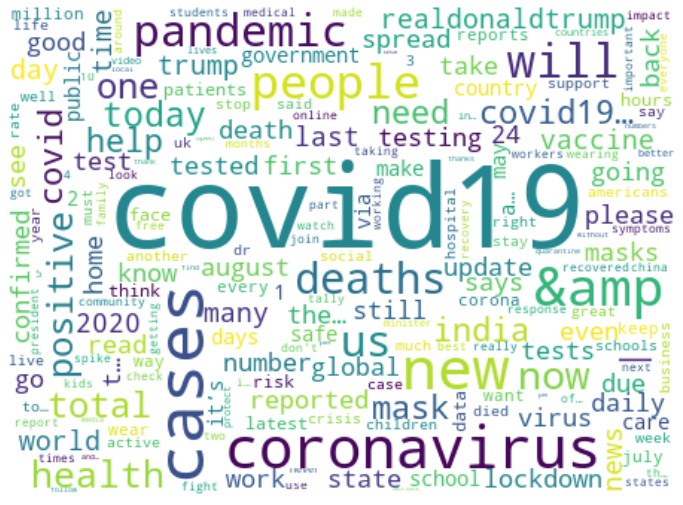

In [29]:
text = df.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Covid-19 is mostly used word in tweets in all user location.

## Thank you